In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Admission_Predict.csv")
print(df)

     Serial No.  GRE Score  TOEFL Score  University Rating  CGPA  \
0             1        337          118                  4  9.65   
1             2        324          107                  4  8.87   
2             3        316          104                  3  8.00   
3             4        322          110                  3  8.67   
4             5        314          103                  2  8.21   
..          ...        ...          ...                ...   ...   
395         396        324          110                  3  9.04   
396         397        325          107                  3  9.11   
397         398        330          116                  4  9.45   
398         399        312          103                  3  8.78   
399         400        333          117                  4  9.66   

     Chance of Admit   
0                0.92  
1                0.76  
2                0.72  
3                0.80  
4                0.65  
..                ...  
395            

In [ ]:
df.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
CGPA                 0
Chance of Admit      0
dtype: int64

In [ ]:
x = df.iloc[:,0:-1].values
y = df.iloc[:,-1].values

In [ ]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = sc.fit_transform(x)
print(x)

[[-1.72772608  1.76210664  1.74697064  0.79882862  1.76481828]
 [-1.7190658   0.62765641 -0.06763531  0.79882862  0.45515126]
 [-1.71040552 -0.07046681 -0.56252785 -0.07660001 -1.00563118]
 ...
 [ 1.71040552  1.15124883  1.41704229  0.79882862  1.42900622]
 [ 1.7190658  -0.41952842 -0.72749202 -0.07660001  0.30403584]
 [ 1.72772608  1.41304503  1.58200646  0.79882862  1.78160888]]


[0.66617989 0.19834471 0.07284174 0.0325518  0.03008185]


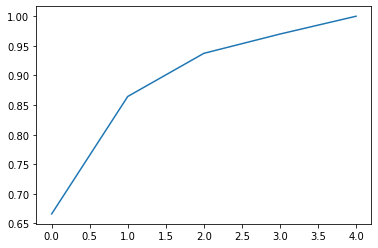

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
x = pca.fit_transform(x)
print(pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
x = pca.fit_transform(x)
print(pca.explained_variance_ratio_)

[0.66617989 0.19834471 0.07284174]


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=50)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred =lr.predict(x_test)
print(y_pred)

[0.68001674 0.68137613 0.66721795 0.95711359 0.63555032 0.77713339
 0.67429662 0.84700323 0.85493615 0.78667976 0.5023922  0.61108935
 0.65379939 0.62171521 0.51634239 0.54227666 0.47528908 0.80622066
 0.66762821 0.64830583 0.88806095 0.86003785 0.84287197 0.88557202
 0.61807753 0.65379522 0.63806153 0.8862671  0.76430895 0.73810357
 0.92134829 0.78782281 0.61874024 0.73763893 0.67380048 0.61232644
 0.60615924 0.71747206 0.81766936 0.71887921 0.9107427  0.65076229
 0.93864337 0.66742381 0.67024083 0.61712601 0.65699699 0.85016131
 0.93543797 0.54115303 0.47139013 0.57166861 0.80551519 0.74739094
 0.62884919 0.66087183 0.93667847 0.72333164 0.90762761 0.93190961
 0.70649568 0.81733978 0.74287773 0.84163485 0.55978829 0.69663153
 0.86275192 0.70536745 0.70605526 0.7162766  0.74110662 0.75366821
 0.71823422 0.78541543 0.66189195 0.61524209 0.79252017 0.68771458
 0.72965742 0.54210407 0.7325226  0.65230698 0.85276812 0.79866952
 0.8540149  0.50158145 0.93317919 0.51240246 0.59342518 0.8070

In [ ]:
!pip install sklearn

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2 = r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('r2_score=',r2)
print('mae=',mae)
print('mse=',mse)
print('rmse=',rmse)



r2_score= 0.7422967541480304
mae= 0.048547626613811755
mse= 0.004337338905123036
rmse= 0.06585847633466049


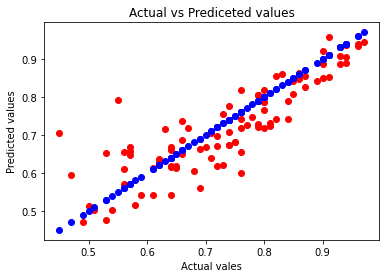

In [ ]:
plt.scatter(y_test, y_pred, color = 'red')
plt.scatter(y_test, y_test, color = 'blue')
plt.xlabel('Actual vales')
plt.ylabel('Predicted values')
plt.title('Actual vs Prediceted values')
plt.show()